-------------------------------------------------------------------
# "Klasifikasi Kucing Dan Kelinci"

# K1_A8
## Al Fiana Nur Priyanti ( 2109106022 )
## Shafira Octafia ( 2109106023 )
--------------------------------------------------------------------

---------------------------------
# IMPORT LIBRARY


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory


----------------------------
# Data Collecting

In [6]:
dataset_train = image_dataset_from_directory(
    'files/',
    labels = 'inferred',
    label_mode = 'int',
    class_names = ['Cat', 'Rabbit'],
    image_size = ( 80, 80 ),
    shuffle = True,
    seed = 47,
    validation_split = 0.1, # 10% Data untuk validasi
    subset = 'training'
    
)

Found 2029 files belonging to 2 classes.
Using 1827 files for training.


--------------------------------------
# Data Preprocessing


## Preview Images

In [8]:
import matplotlib.pyplot as plt 
class_names = dataset_train.class_names

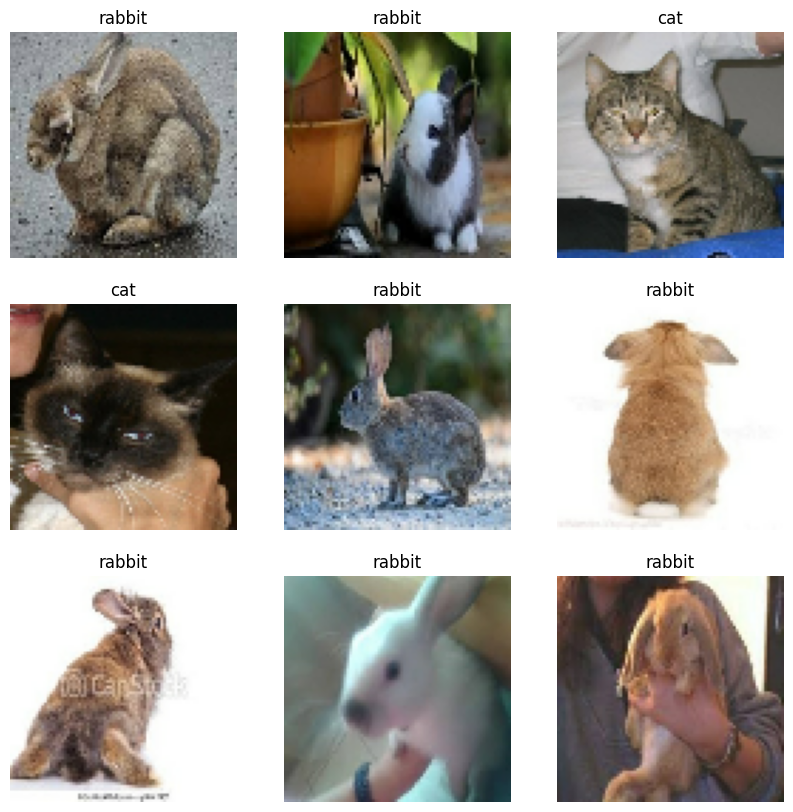

In [10]:
plt.figure ( figsize = ( 10, 10))
for images, labels in dataset_train.take(1):
    for i in range (9):
        ax = plt.subplot (3, 3, i+1) # 3 baris 3 kolom
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis('off')
        

-----------------------------------
## Augmented Gambar

In [12]:
def augment (x,y):
    image = tf.image.random_brightness (x,max_delta = 0.5)
    return image, y

In [13]:
dataset_train = dataset_train.map(augment)

In [23]:
model.fit (dataset_train, epochs = 10, verbose = 1)

Epoch 1/10
45/45 [==============================] - 8s 136ms/step - loss: 175.4718 - accuracy: 0.6403
Epoch 2/10
45/45 [==============================] - 5s 116ms/step - loss: 8.9276 - accuracy: 0.8181
Epoch 3/10
45/45 [==============================] - 5s 116ms/step - loss: 2.3155 - accuracy: 0.8979
Epoch 4/10
45/45 [==============================] - 5s 118ms/step - loss: 1.1049 - accuracy: 0.9396
Epoch 5/10
45/45 [==============================] - 5s 116ms/step - loss: 0.8292 - accuracy: 0.9535
Epoch 6/10
45/45 [==============================] - 5s 116ms/step - loss: 0.2697 - accuracy: 0.9861
Epoch 7/10
45/45 [==============================] - 5s 116ms/step - loss: 0.1009 - accuracy: 0.9875
Epoch 8/10
45/45 [==============================] - 5s 114ms/step - loss: 0.1092 - accuracy: 0.9910
Epoch 9/10
45/45 [==============================] - 5s 115ms/step - loss: 0.2381 - accuracy: 0.9826
Epoch 10/10
45/45 [==============================] - 6s 128ms/step - loss: 0.2178 - accuracy: 0.98